### Libraries¶

In [32]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions

In [18]:
def get_file_path(base_folder_path,file_name):
    """
    This function takes the parameter base_folder_path and file_name
    Return final path of file
    """
    return base_folder_path + file_name

def get_data_frame_from_csv(file_path):
    """
    This function is used to create and return the data frame from csv file
    parameters: file_path
    return: Panda data frame
    """
    return pd.read_csv(file_path)


### Data load

In [19]:
# Base folder path
base_folder = "../source/"
# Exihibitor file path
exhibitors_path = get_file_path(base_folder,"exhibitors.csv")
# Exhibitor categories path
exhibitors_categories_path = get_file_path(base_folder,"exhibitor_categories.csv")

In [20]:
exhibitors = get_data_frame_from_csv(exhibitors_path) #exhibitors exhibitors_categories
exhibitors_categories = get_data_frame_from_csv(exhibitors_categories_path) # Exihibitor Categories data frame

#### Data cleaning and processing

In [21]:
exhibitors.head()

,exhibitorid,Name,MainCategories
0,90556,Turkey Travels,52276|52280|52281
1,92462,Russian Travel Company,52273|52283|52289|52291|52298|52302
2,92491,Indian Travel Company,52273|52274|52281
3,92492,Asia Tourism,52272|52276|52352|52358
4,92493,SriLanka Adventures,52296|52327|52352


#### Onservations
- There are four features
- exhibitorid:- It is unique identifier for exihibitor
- Name:- Exihibitor Name
- MainCategories:- This is the string in which categories are sepearted by |

In [22]:
# Get the null value counts of columns
exhibitors.isna().sum()

exhibitorid       0
Name              0
MainCategories    0
dtype: int64

#### Observations
- There are no column which has null value

In [23]:
exhibitors_categories.head()

,categoryId,categoryName
0,52271,1. Accomodation providers
1,52272,1.1 Hotel / Hotel chain / Inn
2,52273,1.2 Apartments / Residential hotel
3,52274,1.3 Hostel / Motel
4,52275,1.4 Boarding house


#### Observations
- Exihibitor Categories has two features
- categoryid:- Uniquely identify the category
- category name:- Some category name has back slash, we need to remove this

In [24]:
# Exihibitor categories null value count
exhibitors_categories.isna().sum()

categoryId      0
categoryName    0
dtype: int64

In [25]:
# Split the main category feature using pipe(|) sepeartor
exhibitors["MainCategories"] = exhibitors["MainCategories"].str.split("|")
# Explode array of Main categories
exhibitors_explode = exhibitors.explode("MainCategories")
# Cast Maincategories to int
exhibitors_explode["MainCategories"] = exhibitors_explode["MainCategories"].astype(int)
exhibitors_explode.head()

,exhibitorid,Name,MainCategories
0,90556,Turkey Travels,52276
0,90556,Turkey Travels,52280
0,90556,Turkey Travels,52281
1,92462,Russian Travel Company,52273
1,92462,Russian Travel Company,52283


In [26]:
# Merge exhibitor and exhibitor categories 
exhibitors_final = exhibitors_explode.merge(exhibitors_categories, left_on = "MainCategories",right_on = "categoryId",how="left")
exhibitors_final.head()

,exhibitorid,Name,MainCategories,categoryId,categoryName
0,90556,Turkey Travels,52276,52276,1.5 Resort hotel
1,90556,Turkey Travels,52280,52280,2.1 Inbound tour operator
2,90556,Turkey Travels,52281,52281,2.2 Outbound tour operator
3,92462,Russian Travel Company,52273,52273,1.2 Apartments / Residential hotel
4,92462,Russian Travel Company,52283,52283,2.4 Mass market tour operators


In [27]:
# Remove the back slash (/) from category name
exhibitors_final["categoryName"] = exhibitors_final["categoryName"].apply(lambda x: x.replace("/", " "))
exhibitors_final.head()

,exhibitorid,Name,MainCategories,categoryId,categoryName
0,90556,Turkey Travels,52276,52276,1.5 Resort hotel
1,90556,Turkey Travels,52280,52280,2.1 Inbound tour operator
2,90556,Turkey Travels,52281,52281,2.2 Outbound tour operator
3,92462,Russian Travel Company,52273,52273,1.2 Apartments Residential hotel
4,92462,Russian Travel Company,52283,52283,2.4 Mass market tour operators


In [28]:
# Drop MainCategories column
exhibitors_final.drop(["MainCategories"],axis = 1,inplace = True)
exhibitors_final.head()

,exhibitorid,Name,categoryId,categoryName
0,90556,Turkey Travels,52276,1.5 Resort hotel
1,90556,Turkey Travels,52280,2.1 Inbound tour operator
2,90556,Turkey Travels,52281,2.2 Outbound tour operator
3,92462,Russian Travel Company,52273,1.2 Apartments Residential hotel
4,92462,Russian Travel Company,52283,2.4 Mass market tour operators


In [29]:
# Get final data frame column null value count
exhibitors_final.isna().sum()

exhibitorid     0
Name            0
categoryId      0
categoryName    0
dtype: int64

In [30]:
exhibitors_final.drop_duplicates(inplace=True)
exhibitors_final.fillna("NA", inplace=True)

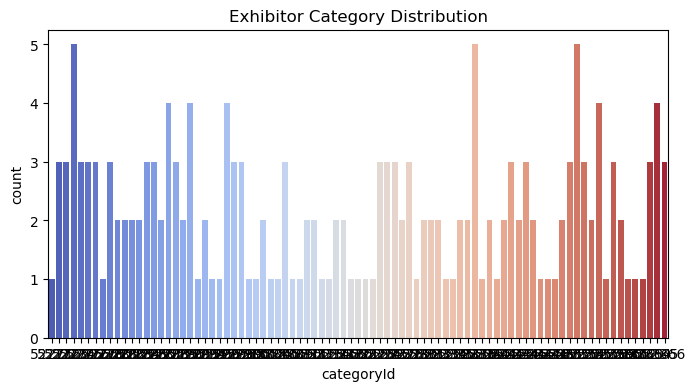

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(data=exhibitors_final, x="categoryId", palette="coolwarm")
plt.title("Exhibitor Category Distribution")
plt.show()

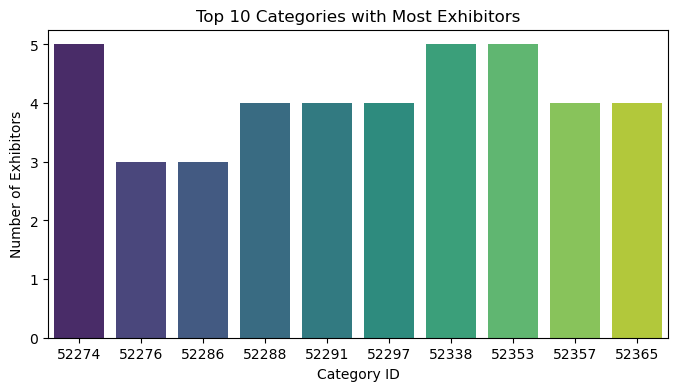

In [73]:
# To 10 categories on the basis of count
top_ten_categories = exhibitors_final["categoryId"].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_ten_categories.index, y=top_ten_categories.values, palette="viridis")
plt.xlabel("Category ID")
plt.ylabel("Number of Exhibitors")
plt.title("Top 10 Categories with Most Exhibitors")
plt.show()

In [74]:
#  top 10 category id list
top_ten_categories.index.to_list() 

[52338, 52353, 52274, 52288, 52365, 52291, 52297, 52357, 52276, 52286]

In [60]:
exhibitors_final[exhibitors_final["categoryId"] == 52274].head()

,exhibitorid,Name,categoryId,categoryName
10,92491,Indian Travel Company,52274,1.3 Hostel Motel
19,92494,Exotic Europe Travels,52274,1.3 Hostel Motel
44,68142,Global Tours Voyages,52274,1.3 Hostel Motel
80,13033,Prime Vacations Expeditions,52274,1.3 Hostel Motel
87,15881,Royal Trips Tours,52274,1.3 Hostel Motel


In [75]:
top_categories_name = []
top_categories = top_ten_categories.index.to_list()
for categoryId in top_categories:
    names = exhibitors_final[exhibitors_final["categoryId"] == categoryId]["categoryName"].unique().tolist()
    top_categories_name.extend(names)
top_categories_name

['12.2 NTO: National tourism office',
 '14.6 Gastro tourism',
 '1.3 Hostel   Motel',
 '3.2 Authorized travel agency',
 '17.2 Payment service provider',
 '4.1 Search engine for travel   Aggregator',
 '5.5 Helicopter services',
 '15.1 Print media',
 '1.5 Resort hotel',
 '3. Travel  agencies']

#### Observation
- Top 10 exihibitor categories are
- '12.2 NTO: National tourism office',
 '14.6 Gastro tourism',
 '1.3 Hostel   Motel',
 '3.2 Authorized travel agency',
 '17.2 Payment service provider',
 '4.1 Search engine for travel   Aggregator',
 '5.5 Helicopter services',
 '15.1 Print media',
 '1.5 Resort hotel',
 '3. Travel  agencies'

In [62]:
exhibitors_final.head()

,exhibitorid,Name,categoryId,categoryName
0,90556,Turkey Travels,52276,1.5 Resort hotel
1,90556,Turkey Travels,52280,2.1 Inbound tour operator
2,90556,Turkey Travels,52281,2.2 Outbound tour operator
3,92462,Russian Travel Company,52273,1.2 Apartments Residential hotel
4,92462,Russian Travel Company,52283,2.4 Mass market tour operators


In [83]:
category_counts = exhibitors_final.groupby("categoryName")["exhibitorid"].count().reset_index()
category_counts.columns = ["categoryName", "exhibitorCount"]
category_counts = category_counts.sort_values(by="exhibitorCount", ascending=False)
print("Exhibitor Count per Category:\n", category_counts.head(10))

Exhibitor Count per Category:
                                  categoryName  exhibitorCount
21          12.2 NTO: National tourism office               5
35                        14.6 Gastro tourism               5
3                          1.3 Hostel   Motel               5
56               3.2 Authorized travel agency               4
59  4.1 Search engine for travel   Aggregator               4
64                    5.5 Helicopter services               4
46              17.2 Payment service provider               4
38                           15.1 Print media               4
34                    14.5 Industrial tourism               3
72                7. Mobile homes & glampings               3


In [84]:
exhibitor_mean = category_counts["exhibitorCount"].mean()
category_counts["categoryType"] = category_counts["exhibitorCount"].apply(lambda x: "Popular" if x > exhibitor_mean else "Not popular")
print("Category Classification:\n", category_counts.head(100))

Category Classification:
                                    categoryName  exhibitorCount categoryType
21            12.2 NTO: National tourism office               5      Popular
35                          14.6 Gastro tourism               5      Popular
3                            1.3 Hostel   Motel               5      Popular
56                 3.2 Authorized travel agency               4      Popular
59    4.1 Search engine for travel   Aggregator               4      Popular
..                                          ...             ...          ...
43  16.2 Real estate, property and homes abroad               1  Not popular
44            17. Insurance companies & banking               1  Not popular
60                                 5.1 Airlines               1  Not popular
62                          5.3 Railway company               1  Not popular
84   9.5 Equipment for restaurants and catering               1  Not popular

[85 rows x 3 columns]


In [90]:
from sklearn.cluster import KMeans
import numpy as np
def hyper_parameter_tuning(k_value, df, feature_list):
    
    inertia = []
    for k in range(1, k_value + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        model.fit(df[feature_list])
        inertia.append(model.inertia_)
    
    plt.plot(range(1, k_value + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Value')
    plt.title('Optimal value for K')
    plt.show()
        

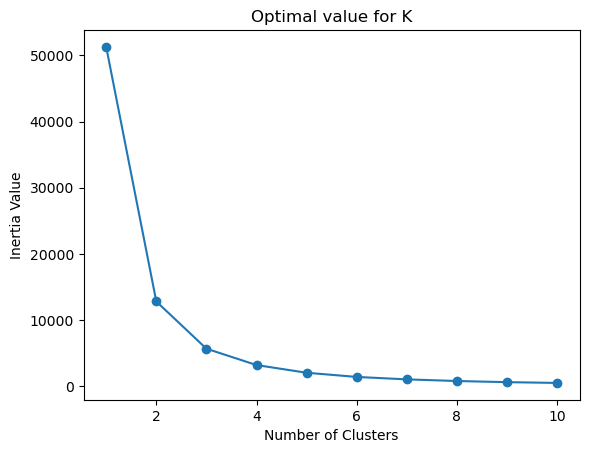

In [91]:
category_counts["categoryId"] = pd.factorize(category_counts["categoryName"])[0]
hyper_parameter_tuning(10, category_counts, ["categoryId", "exhibitorCount"])

#### Observations
- Optimal value for k = 3 from above graph

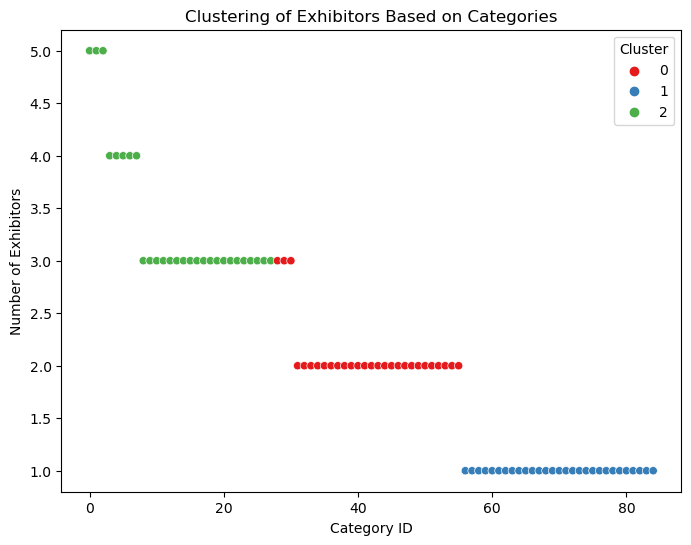

In [92]:
model = KMeans(n_clusters=3, random_state=42)
category_counts["Cluster"] = model.fit_predict(category_counts[["categoryId", "exhibitorCount"]])

# Visualizing Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=category_counts["categoryId"], y=category_counts["exhibitorCount"], hue=category_counts["Cluster"], palette="Set1")
plt.xlabel("Category ID")
plt.ylabel("Number of Exhibitors")
plt.title("Clustering of Exhibitors Based on Categories")
plt.show()

#### Observations
- cluster 0 indicate the high number of exhibitor
- cluster 1 indicate the medium number of exhibitor
- cluster 2 indicate the least number of exhibitor

### Recommendations

- organise the popular categories on prime location
- Promote non popular categories to attract more visitors
- 

In [94]:
exhibitors_final.to_csv(base_folder+"clean_exhibitor.csv")